### Proyek_Dataset_Friends-BM11 VS BM25

In [1]:
import pandas as pd
import re
import nltk
nltk.download('punkt')

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
df = pd.read_csv("Friends dialogues.csv")

# melihat dataset
df.head()

,episode,Dialogue
0,1x01 - The One Where Monica Gets A Roommate.7...,there s nothing to tell it s just some guy i w...
1,1x02 - The One With The Sonogram At The End.,you guys don t understand for us kissing is as...
2,1x03 - The One With The Thumb.720p HDTV.TvR.,hi guys hey pheebs oh oh how d it go um not so...
3,1x04 - The One With George Stephanopoulos.720...,all right phoebe if i were omnipotent for a da...
4,1x05 - The One With The East German Laundry D...,let it go it s not a big deal not a big deal i...


In [3]:
print('Row count is:', len(df))

Row count is: 229


In [4]:
new_df = df.drop("episode", axis=1, inplace=True)

In [5]:
df.head()

,Dialogue
0,there s nothing to tell it s just some guy i w...
1,you guys don t understand for us kissing is as...
2,hi guys hey pheebs oh oh how d it go um not so...
3,all right phoebe if i were omnipotent for a da...
4,let it go it s not a big deal not a big deal i...


In [6]:
df['Dialogue'].isnull().sum()

0

In [7]:
new_df_without_null=df.dropna()

In [8]:
new_df_without_null['Dialogue'].isnull().sum()

0

In [9]:
new_df_without_null.head()

,Dialogue
0,there s nothing to tell it s just some guy i w...
1,you guys don t understand for us kissing is as...
2,hi guys hey pheebs oh oh how d it go um not so...
3,all right phoebe if i were omnipotent for a da...
4,let it go it s not a big deal not a big deal i...


In [10]:
def remove_number(text):
    return  re.sub(r"\[0-9]+", "", str(text))
 
new_df_without_null['Dialogue'] = new_df_without_null['Dialogue'].apply(remove_number)

In [11]:
#remove whitespace leading & trailing
def remove_whitespace_LT(text):
    return text.strip()


new_df_without_null['Dialogue'] =new_df_without_null['Dialogue'].apply(remove_whitespace_LT)

#remove multiple whitespace into single whitespace
def remove_whitespace_multiple(text):
    return re.sub('\s+',' ',text)


new_df_without_null['Dialogue'] = new_df_without_null['Dialogue'].apply(remove_whitespace_multiple)

# remove single char
def remove_singl_char(text):
    return re.sub(r"\b[a-zA-Z]\b", "", text)


new_df_without_null['Dialogue'] = new_df_without_null['Dialogue'].apply(remove_singl_char)

In [12]:
# Tokenisasi for Document
doc_tokens_trec = [word_tokenize(kalimat) for kalimat in new_df_without_null['Dialogue']]
print(*doc_tokens_trec[0:1], sep = "\n")

['there', 'nothing', 'to', 'tell', 'it', 'just', 'some', 'guy', 'work', 'with', 'you', 're', 'going', 'out', 'with', 'the', 'guy', 'there', 'has', 'to', 'be', 'something', 'wrong', 'with', 'him', 'so', 'does', 'he', 'have', 'hump', 'and', 'hairpiece', 'wait', 'does', 'he', 'eat', 'chalk', '6', 'don', 'want', 'her', 'to', 'go', 'through', 'what', 'did', 'with', 'carl', '7', 'okay', 'everybody', 'relax', '8', 'this', 'is', 'not', 'even', 'date', '9', 'it', 'just', 'two', 'people', 'going', 'out', 'to', 'dinner', 'and', 'not', 'having', 'sex', '01', 'sounds', 'like', 'date', 'to', 'me', '01', 'in', 'high', 'school', 'in', 'the', 'cafeteria', '01', 'and', 'realize', 'totally', 'naked', '01', 've', 'had', 'that', 'dream', '01', 'then', 'look', 'down', 'and', 'realize', 'there', 'is', 'phone', '01', 'there', '01', 'instead', 'of', 'that', 'right', '01', 'never', 'had', 'that', 'one', '01', 'all', 'of', 'sudden', 'the', 'phone', 'starts', 'to', 'ring', '01', 'and', 'it', 'turns', 'out', 'it',

In [13]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
# Stopword for Document
doc_stopwords_trec = [[token for token in kalimat if token not in stopwords.words('english')]
                                  for kalimat in doc_tokens_trec]

In [15]:
def punctuation(txt):
  result = re.sub(r'[^\w\s]','',txt)
  return result
df['Dialogue'] = df['Dialogue'].apply(punctuation)


In [16]:
df['Dialogue'][60]

'1 150 ripped with subrip 117 and verified by cdint cdint hotmailcom  i deliver perfection and don t brag about it d  hey eddie   what are you doing here  watching you sleep  why  it makes me feel peaceful  please  i can t sleep now  you want me to sing  that s it i want you out of the apartment now  what are you talking about  hannibal lecter  better roommate than you  i don t think you re being fair one night you see me and you get scared  what about the other nights when you don t see me  last night you went and got some water  and i was nice enough to hide behind the door  i didn t realize that  get out now  you really want me out  yes please  then i want to hear you say you want me out  i want you out  i want to hear it from your lips  where d you hear it before  all right you know what consider me gone  i ll be out by the time you get home from work tomorrow  y i  thank you  i heard that  the one where eddie won t go  english subtitles by gelula co inc  well look at you  finally 

##### BM25

In [17]:
class BM25:
    def __init__(self, k1=1.2, b=0.75):
        self.b = b
        self.k1 = k1

    def fit(self, corpus):
        """
        Fit the various statistics that are required to calculate BM25 ranking
        score using the corpus given.

        Parameters
        ----------
        corpus : list[list[str]]
            Each element in the list represents a document, and each document
            is a list of the terms.

        Returns
        -------
        self
        """
        tf = []
        df = {}
        idf = {}
        doc_len = []
        corpus_size = 0
        for document in corpus:
            corpus_size += 1
            doc_len.append(len(document))

            # compute tf (term frequency) per document
            frequencies = {}
            for term in document:
                term_count = frequencies.get(term, 0) + 1
                frequencies[term] = term_count

            tf.append(frequencies)

            # compute df (document frequency) per term
            for term, _ in frequencies.items():
                df_count = df.get(term, 0) + 1
                df[term] = df_count

        for term, freq in df.items():
            idf[term] = math.log(1 + (corpus_size - freq + 0.5) / (freq + 0.5))

        self.tf_ = tf
        self.df_ = df
        self.idf_ = idf
        self.doc_len_ = doc_len
        self.corpus_ = corpus
        self.corpus_size_ = corpus_size
        self.avg_doc_len_ = sum(doc_len) / corpus_size
        return self

    def search(self, query):
        scores = [self._score(query, index) for index in range(self.corpus_size_)]
        return scores

    def _score(self, query, index):
        score = 0.0

        doc_len = self.doc_len_[index]
        frequencies = self.tf_[index]
        for term in query:
            if term not in frequencies:
                continue

            freq = frequencies[term]
            numerator = self.idf_[term] * freq * (self.k1 + 1)
            denominator = freq + self.k1 * (1 - self.b + self.b * doc_len / self.avg_doc_len_)
            score += (numerator / denominator)

        return score

In [18]:
import math
import json
import requests

In [19]:
# query = "i think i remember you from yesterday"
# stopwords = set(['for', 'a', 'of', 'the', 'and', 'to', 'in'])
# query = [word for word in query.lower().split() if word not in stopwords]

# bm25 = BM25()
# bm25.fit(doc_stopwords_trec)
# scores = bm25.search(query)

# for score, doc in zip(scores, df['Dialogue']):
#     score = round(score, 3)
#     print(str(score) + '\t' + doc)

In [20]:
query = "i think i remember you from yesterday"
stopwords = set(['for', 'a', 'of', 'the', 'and', 'to', 'in'])
query = [word for word in query.lower().split() if word not in stopwords]

bm25 = BM25()
bm25.fit(doc_stopwords_trec)
scores = bm25.search(query)
data1 = []
data2 =[]
for score, doc in zip(scores, df['Dialogue']):
    score = round(score, 3)
    data1.append(str(score))
    data2.append(doc)

In [21]:
print("average doc length is :", bm25.avg_doc_len_)

average doc length is : 1434.0917030567687


In [22]:
data4 = pd.DataFrame({'Score':data1,'Doc':data2})

In [23]:
data4.head(10)

,Score,Doc
0,0.533,there s nothing to tell it s just some guy i w...
1,0.688,you guys don t understand for us kissing is as...
2,0.523,hi guys hey pheebs oh oh how d it go um not so...
3,0.635,all right phoebe if i were omnipotent for a da...
4,0.007,let it go it s not a big deal not a big deal i...
5,0.543,oh look there s joey s picture this is so exci...
6,1.806,hey gorgeous how s it going dehydrated japanes...
7,1.806,hey gorgeous how s it going dehydrated japanes...
8,0.402,terry i know i haven t worked here long bu...
9,0.389,guys there s somebody i d like you to meet wai...


##### BM11

In [24]:
class BM11:
    def __init__(self, k1=1.5, b=1):
        self.b = b
        self.k1 = k1

    def fit(self, corpus):
        """
        Fit the various statistics that are required to calculate BM11 ranking
        score using the corpus given.

        Parameters
        ----------
        corpus : list[list[str]]
            Each element in the list represents a document, and each document
            is a list of the terms.

        Returns
        -------
        self
        """
        tf = []
        df = {}
        idf = {}
        doc_len = []
        corpus_size = 0
        for document in corpus:
            corpus_size += 1
            doc_len.append(len(document))

            # compute tf (term frequency) per document
            frequencies = {}
            for term in document:
                term_count = frequencies.get(term, 0) + 1
                frequencies[term] = term_count

            tf.append(frequencies)

            # compute df (document frequency) per term
            for term, _ in frequencies.items():
                df_count = df.get(term, 0) + 1
                df[term] = df_count

        for term, freq in df.items():
            idf[term] = math.log(1 + (corpus_size - freq + 0.5) / (freq + 0.5))

        self.tf_ = tf
        self.df_ = df
        self.idf_ = idf
        self.doc_len_ = doc_len
        self.corpus_ = corpus
        self.corpus_size_ = corpus_size
        self.avg_doc_len_ = sum(doc_len) / corpus_size
        return self

    def search(self, query):
        scores = [self._score(query, index) for index in range(self.corpus_size_)]
        return scores

    def _score(self, query, index):
        score = 0.0

        doc_len = self.doc_len_[index]
        frequencies = self.tf_[index]
        for term in query:
            if term not in frequencies:
                continue

            freq = frequencies[term]
            numerator = self.idf_[term] * freq * (self.k1 + 1)
            denominator = freq + self.k1 * (1 - self.b + self.b * doc_len / self.avg_doc_len_)
            score += (numerator / denominator)

        return score

In [25]:
import math
import json
import requests

In [26]:
query = "i think i remember you from yesterday"
stopwords = set(['for', 'a', 'of', 'the', 'and', 'to', 'in'])
query = [word for word in query.lower().split() if word not in stopwords]

bm11 = BM11()
bm11.fit(doc_stopwords_trec)
scores = bm11.search(query)
data1 = []
data2 =[]
for score, doc in zip(scores, df['Dialogue']):
    score = round(score, 3)
    data1.append(str(score))
    data2.append(doc)

In [27]:
print("average doc length is :", bm11.avg_doc_len_)

average doc length is : 1434.0917030567687


In [28]:
data5 = pd.DataFrame({'Score':data1,'Doc':data2})

In [29]:
data5.head(10)

,Score,Doc
0,0.559,there s nothing to tell it s just some guy i w...
1,0.755,you guys don t understand for us kissing is as...
2,0.544,hi guys hey pheebs oh oh how d it go um not so...
3,0.678,all right phoebe if i were omnipotent for a da...
4,0.007,let it go it s not a big deal not a big deal i...
5,0.575,oh look there s joey s picture this is so exci...
6,1.873,hey gorgeous how s it going dehydrated japanes...
7,1.873,hey gorgeous how s it going dehydrated japanes...
8,0.412,terry i know i haven t worked here long bu...
9,0.392,guys there s somebody i d like you to meet wai...


##### BM11 VS BM25 Q1

In [30]:
df = pd.DataFrame(data4,columns=['Score','Doc'])

In [31]:
data5['score2'] = data4['Score']

In [32]:
new_df = data5.head(20)

In [33]:
listbaru = []
j = 1
for i in new_df['Doc']:
    listbaru.append(j)
    j+=1

new_df['doc_no'] = listbaru

<ipython-input-33-0cc27fc5d3c9>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['doc_no'] = listbaru


In [34]:
new_df['Score'] = new_df['Score'].astype(float)
new_df['score2'] = new_df['score2'].astype(float)

<ipython-input-34-2b6b1e9ad63a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Score'] = new_df['Score'].astype(float)
<ipython-input-34-2b6b1e9ad63a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['score2'] = new_df['score2'].astype(float)


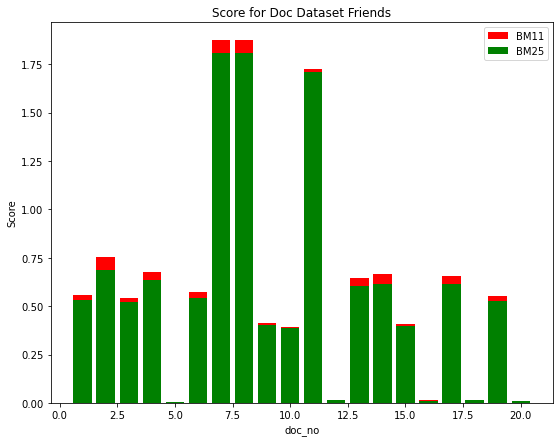

In [35]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=[9, 7])
plt.bar(new_df['doc_no'], new_df['Score'], color='r', label='BM11', linestyle = 'dashed')
plt.bar(new_df['doc_no'], new_df['score2'], color='g', label='BM25')
plt.xlabel("doc_no")
plt.ylabel("Score")
plt.title("Score for Doc Dataset Friends")
plt.legend()
plt.show()